<h1 style="color:black;">HW03 </h1>

**BY WASIM RAJA MONDAL**

<h3 style="color:black;"> 1. Creating a folder on my computer</h3>

In [1]:
!pwd #created a folder

/Users/wasim/Desktop/HW03


In [2]:
!ls #created another folder data inside teh folder

HW03_MondalW.ipynb data


<h3 style="color:black;"> 2. From D2L, download Real Estate Data.csv and Create a Jupyter Notebook.</h3>

In [3]:
!pwd

/Users/wasim/Desktop/HW03


In [4]:
!ls data/

Real Estate Data - Week 3.csv


In [5]:
!ls

HW03_MondalW.ipynb data


<h3 style="color:black;"> 3. Import libraries (numpy, pandas, matplotlib, seaborn, statsmodels, style)</h3>

In [1]:
!pip install numpy #installing numpy
!pip install pandas #installing pandas
!pip install matplotlib #installing matplotlib
!pip install seaborn #installing seaborn
!pip install statsmodels #installing statmodel
import numpy as np  #importing numpy
import pandas as pd #importing pandas
import seaborn as sns #importing seaborn
import pandas as pd #importing pandas
import statsmodels  #importing statmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
plt.style.use("seaborn-v0_8-whitegrid") ##a style that can be used for plots


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


<h3 style="color:black;"> 4. Import Data</h3>

In [2]:
#importing a csv file Real Estate Data - Week 3.csv from the directory named as data with index_col=none and header=0
#index_col=none suggests no column should be used as index. Pandas will autometically generate a numeric index (0,1,2,..) 
#header=0 means the first row (row 0) of the csv file contains the column names

In [3]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 3.csv', index_col = None, header=0)

In [4]:
df_realestate.info() #executing the view of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1390 non-null   int64  
 1   Dwelling Type             1390 non-null   object 
 2   Lot Frontage              1138 non-null   float64
 3   Lot Area                  1390 non-null   int64  
 4   Alley                     83 non-null     object 
 5   Land Contour              1390 non-null   object 
 6   Neighborhood              1390 non-null   object 
 7   Location Condition        1390 non-null   object 
 8   Overall Quality           1390 non-null   int64  
 9   Overall Cond              1390 non-null   int64  
 10  Year Built                1390 non-null   int64  
 11  Masonry/Veneer Area       1382 non-null   float64
 12  Basement Finished Area    1390 non-null   int64  
 13  Basement Unfinished Area  1390 non-null   int64  
 14  Basement

<h3 style="color:black;"> 5. Simple Linear Regression</h3>

<h4 style="color:black;"> 5a: Create the X and y datasets and Simple Regression</h4>

In [5]:
X = df_realestate['Living Area Above Grade'] #creating X dataset with Living Area Above Grade
y = df_realestate['Sale Price'] # creating Y dataset with Sale Price
X = sm.add_constant(X) # adding a constant
reg = sm.OLS(y, X).fit() # fitting the model and name the model reg
pred = reg.predict(X)   # predicting with the model and name it pred
resid = reg.resid    #creating the residuals and name it resid
reg.summary()   #summary of the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     1199.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):          7.76e-190
Time:                        16:34:25   Log-Likelihood:                -17076.
No. Observations:                1390   AIC:                         3.416e+04
Df Residuals:                    1388   BIC:                         3.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.369e+04   4485.277      7.511      0.000    2.49e+04    4.25e+04
Living Area Above Grade    96.9264      2.800     34.620      0.000      91.434     102.419
==============================================================================
Omnibus:                      180.493   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1755.914
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       8.493   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h4 style="color:black;"> 5b: Create a Regression Table</h4>

In [6]:
df_reg = df_realestate[['Living Area Above Grade', 'Sale Price']]
df_reg = pd.concat([df_reg, pd.DataFrame(pred)], axis=1, ignore_index=False)
df_reg['1']=pd.DataFrame(resid)
df_reg.head(10)

,Living Area Above Grade,Sale Price,0,1
0,1710,208500,199432.115140,9067.884860
1,1262,181500,156009.099394,25490.900606
2,1786,223500,206798.519597,16701.480403
3,1717,140000,200110.599761,-60110.599761
4,2198,250000,246732.185862,3267.814138
5,1362,143000,165701.736837,-22701.736837
6,1694,307000,197881.293149,109118.706851
7,2090,200000,236264.137424,-36264.137424
8,1774,129900,205635.403103,-75735.403103
9,1077,118000,138077.720124,-20077.720124


In [7]:
df_reg=df_reg.rename(columns = {0:'Sale Price Predicted'})
df_reg=df_reg.rename(columns = {'1':'Residual'})
df_reg.head(10)

,Living Area Above Grade,Sale Price,Sale Price Predicted,Residual
0,1710,208500,199432.115140,9067.884860
1,1262,181500,156009.099394,25490.900606
2,1786,223500,206798.519597,16701.480403
3,1717,140000,200110.599761,-60110.599761
4,2198,250000,246732.185862,3267.814138
5,1362,143000,165701.736837,-22701.736837
6,1694,307000,197881.293149,109118.706851
7,2090,200000,236264.137424,-36264.137424
8,1774,129900,205635.403103,-75735.403103
9,1077,118000,138077.720124,-20077.720124


<h4 style="color:black;"> 5c: Create a Regression Plot (regplot)</h4>

Text(0, 0.5, 'Sale Price')

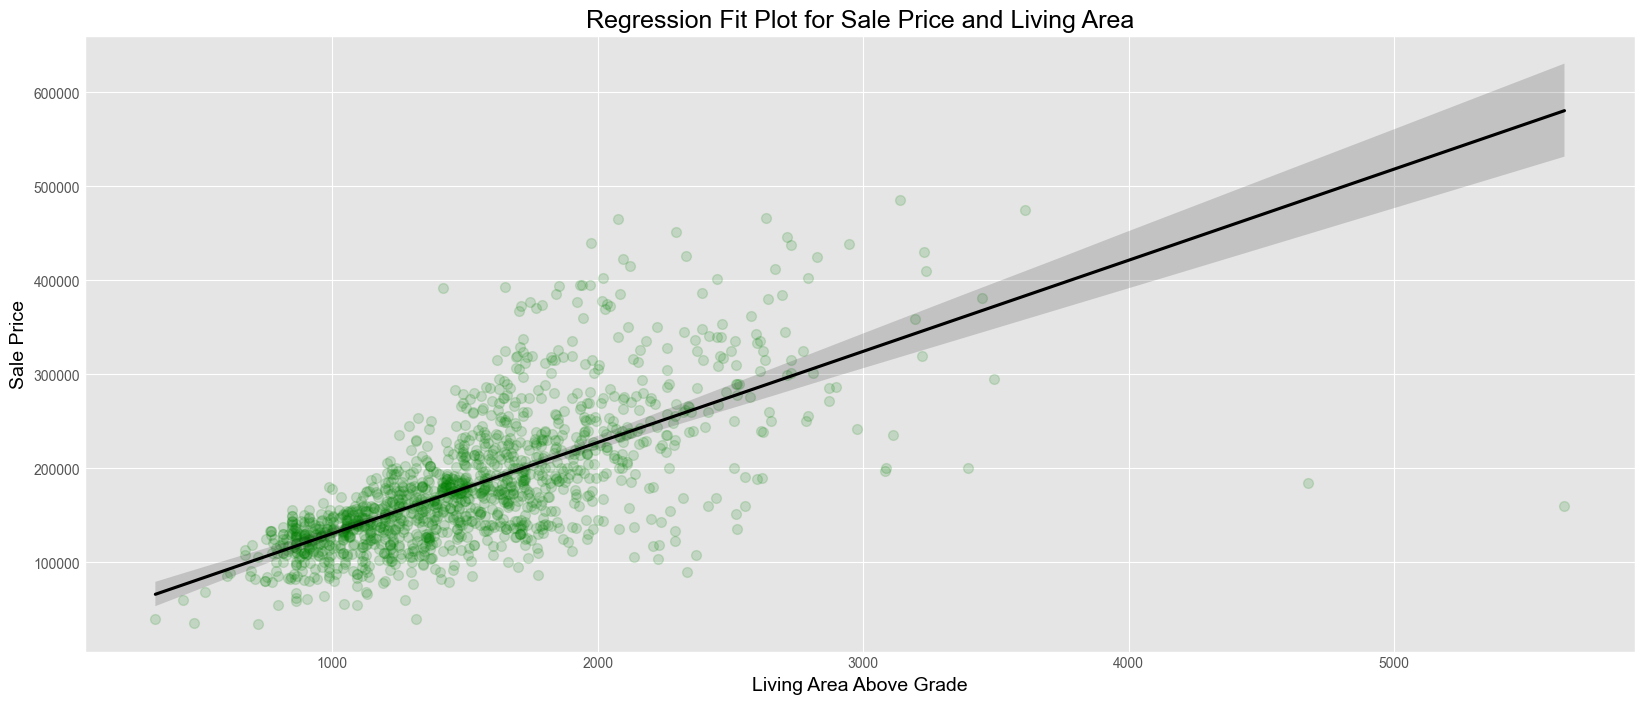

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
sns.regplot(x='Living Area Above Grade', y='Sale Price', data = df_reg, scatter_kws={"color":"green","alpha":0.15,"s":50},
           line_kws={'color': 'black'})
plt.title('Regression Fit Plot for Sale Price and Living Area', color = 'black', fontsize='18', loc='center')
plt.xlabel('Living Area Above Grade', color = 'black', fontsize='14',loc='center')
plt.ylabel('Sale Price', color = 'black', fontsize='14', loc='center')

<h4 style="color:black;"> 5d: Create a Residual Plot (residplot)</h4>

Text(0, 0.5, 'Residual of predicted Sale price')

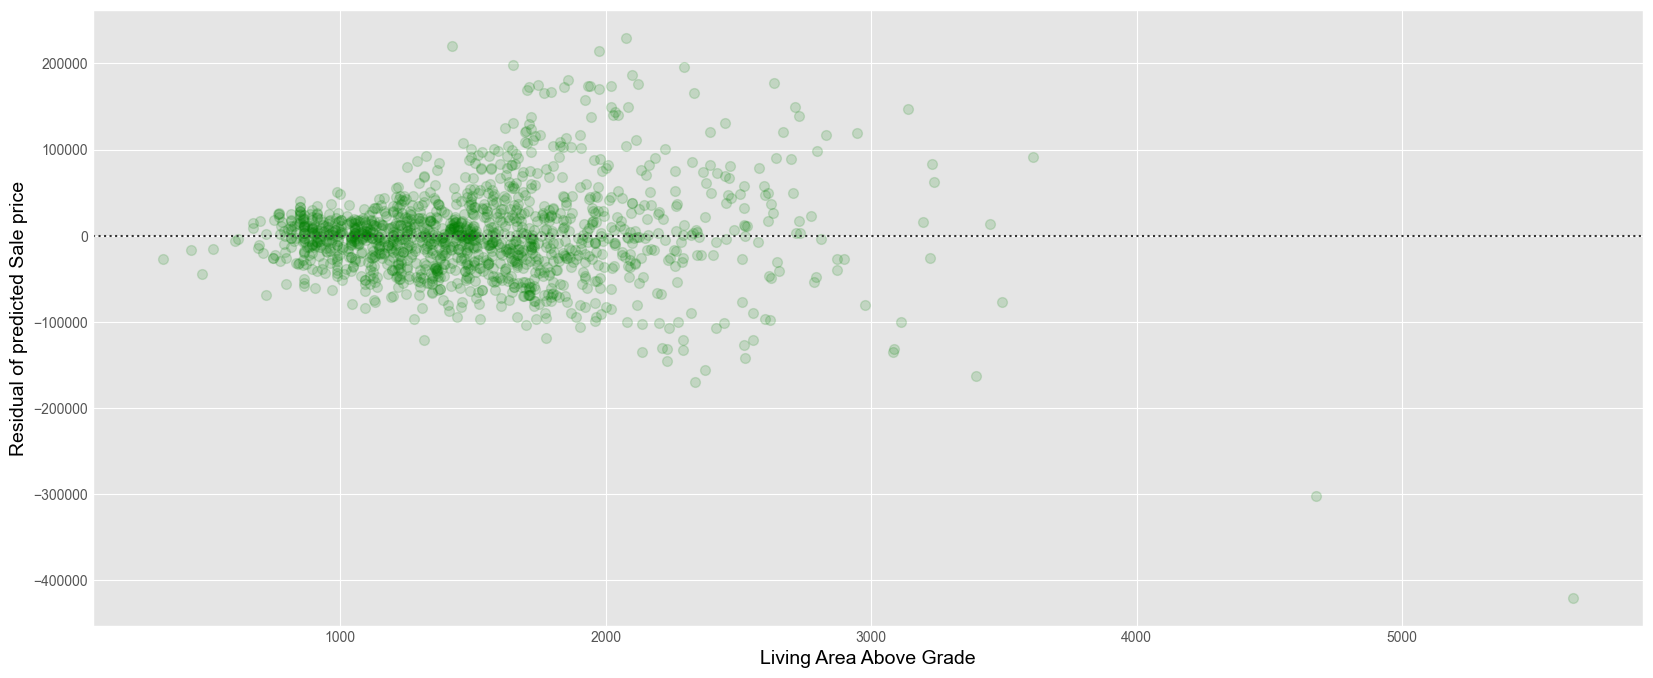

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
sns.residplot(x='Living Area Above Grade', y='Residual', data = df_reg, scatter_kws={"color":"green","alpha":0.15,"s":50},
           line_kws={'color': 'black'})
plt.xlabel('Living Area Above Grade', color = 'black', fontsize='14',loc='center')
plt.ylabel('Residual of predicted Sale price', color = 'black', fontsize='14',loc='center')

<h4 style="color:black;"> 5e: Create a Regression Plot (lmplot) based on Garage Cars</h4>

<Figure size 2000x800 with 0 Axes>

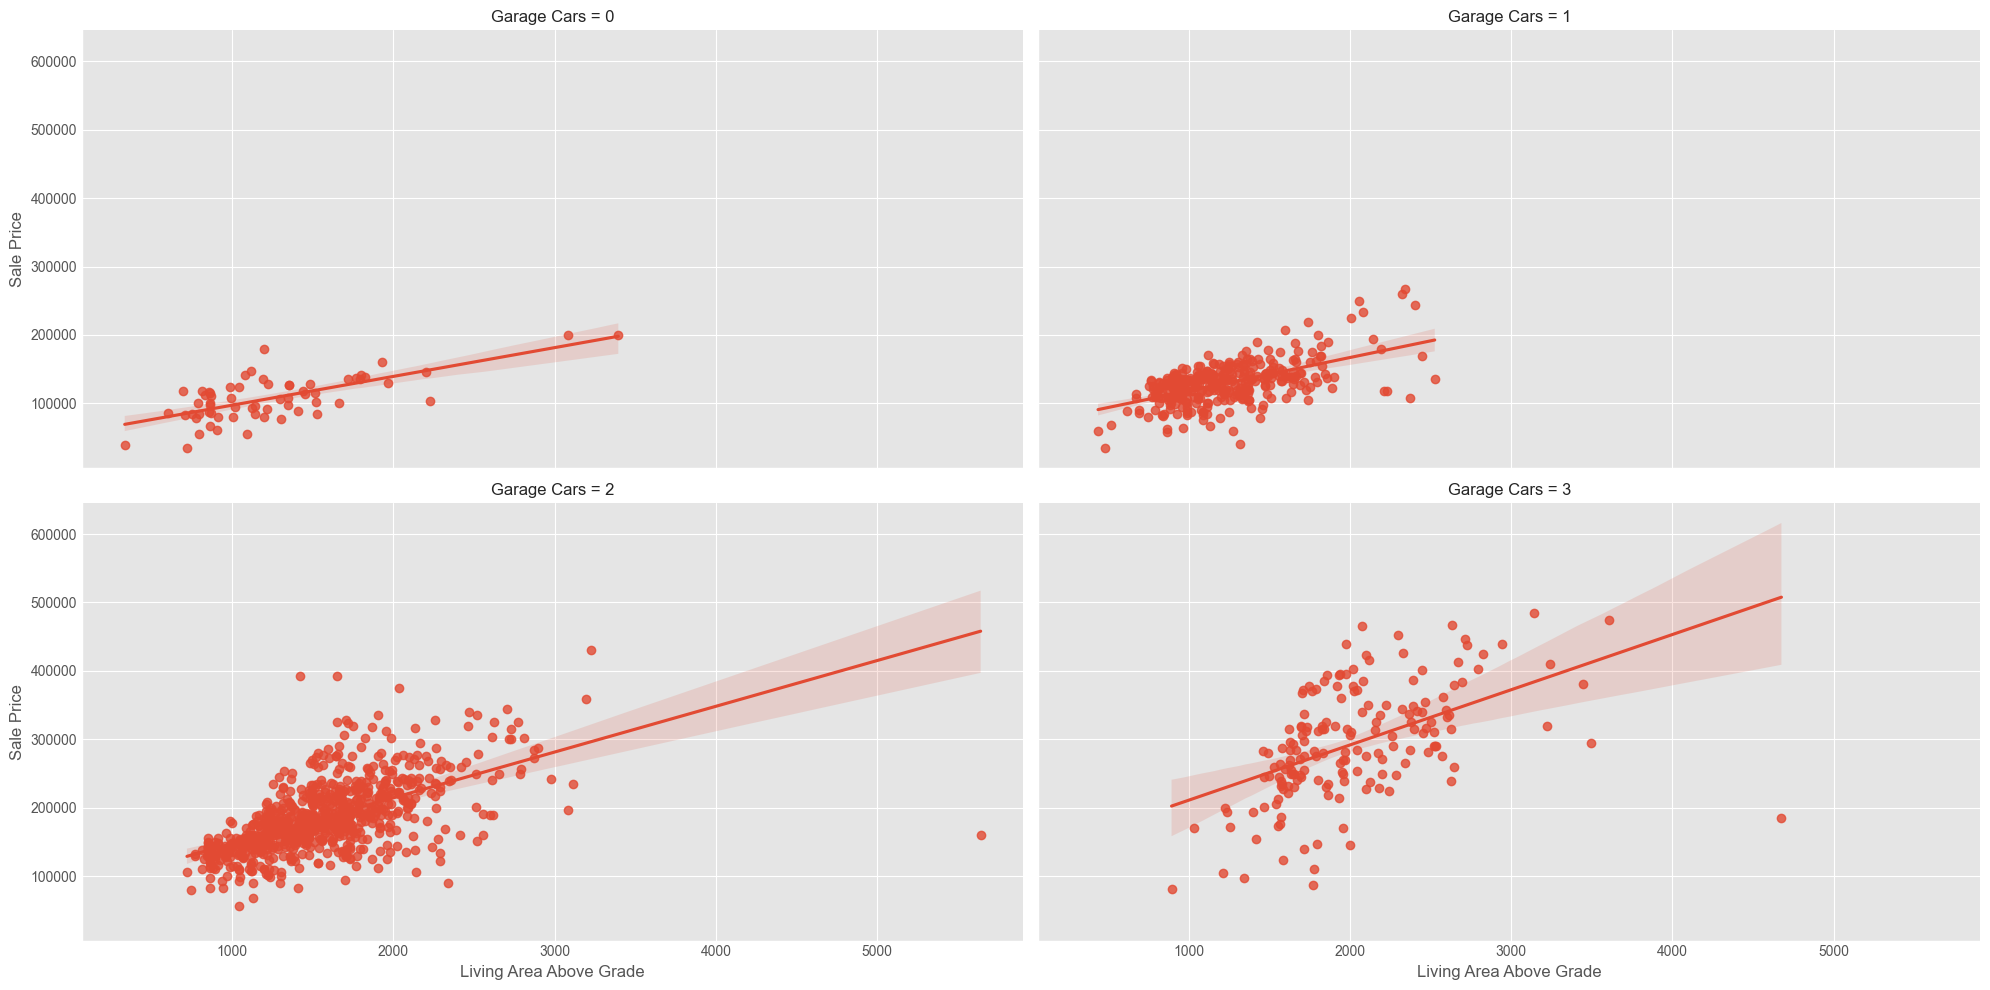

In [10]:
plt.figure(figsize=(20,8))
sns.lmplot(x='Living Area Above Grade', y='Sale Price', data =df_realestate,  col = 'Garage Cars', col_wrap =2, palette="Set1", aspect=2 )

<h4 style="color:black;"> 5f: Explanation of Simple Regression Results</h4>

<h4 style="color:black;"> 5f.1: Relationship between target and feature variables</h4>

From the regression plot between the Sale Price and Living Area Above Grade, first of all, we observe that the slope is positive which suggests that when the Living area above grade will increase, the Sale Price will also increase.   

<h4 style="color:black;"> 5f.2: Explanation of the results</h4>

In ideal situation, all the data points in the regression plot should fall onto the line. But, here, we can see from the regression plot, it is not the case. Here data points are scattred from the line which indicates the curent model is not a best model. This is also reflected in R2 score. As we see from summary, R2 score is 0.463. For a best model, R2 score can be close to 1 like 0.99. Thus, it suggests this is not the best fit model. 

<h3 style="color:black;"> 6. Multiple Regression</h3>

<h4 style="color:black;"> 6a: Create a Multiple regression for Sale Price with ‘Living Area Above Grade’ and ‘Garage Cars</h4>

In [15]:
X = df_realestate[['Living Area Above Grade', 'Garage Cars']]
y = df_realestate['Sale Price']
X = sm.add_constant(X) # adding a constant
reg2 = sm.OLS(y, X).fit() # fitting the model and name the model reg
pred2 = reg2.predict(X)   # predicting with the model and name it pred
resid2 = reg2.resid    #creating the residuals and name it resid
reg2.summary()   #summary of the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):          5.79e-292
Time:                        16:54:42   Log-Likelihood:                -16837.
No. Observations:                1390   AIC:                         3.368e+04
Df Residuals:                    1387   BIC:                         3.370e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2366.5055   4067.359     -0.582      0.561   -1.03e+04    5612.334
Living Area Above Grade    68.6612      2.638     26.029      0.000      63.487      73.836
Garage Cars              4.436e+04   1857.324     23.885      0.000    4.07e+04     4.8e+04
==============================================================================
Omnibus:                      151.685   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.044
Skew:                           0.084   Prob(JB):                    1.31e-267
Kurtosis:                       7.604   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h4 style="color:black;"> 6b: Create a Regression Table for Multiple Regression</h4>

In [16]:
df_reg2 = pd.DataFrame()
df_reg2 = df_realestate[['Living Area Above Grade', 'Garage Cars','Sale Price']]
df_reg2 = pd.concat([df_reg2, pred2], axis=1, ignore_index=False)
df_reg2['1']=resid2
df_reg2.head(10)

,Living Area Above Grade,Garage Cars,Sale Price,0,1
0,1710,2,208500,203768.988587,4731.011413
1,1262,2,181500,173008.762367,8491.237633
2,1786,2,223500,208987.241249,14512.758751
3,1717,3,140000,248612.021697,-108612.021697
4,2198,3,250000,281638.068152,-31638.068152
5,1362,2,143000,179874.884291,-36874.884291
6,1694,2,307000,202670.409079,104329.590921
7,2090,2,200000,229860.251899,-29860.251899
8,1774,2,129900,208163.306619,-78263.306619
9,1077,1,118000,115944.032233,2055.967767


In [17]:
df_reg2=df_reg2.rename(columns = {0:'Sale Price Predicted'})
df_reg2=df_reg2.rename(columns = {'1':'Residual'})
df_reg2.head(10)

,Living Area Above Grade,Garage Cars,Sale Price,Sale Price Predicted,Residual
0,1710,2,208500,203768.988587,4731.011413
1,1262,2,181500,173008.762367,8491.237633
2,1786,2,223500,208987.241249,14512.758751
3,1717,3,140000,248612.021697,-108612.021697
4,2198,3,250000,281638.068152,-31638.068152
5,1362,2,143000,179874.884291,-36874.884291
6,1694,2,307000,202670.409079,104329.590921
7,2090,2,200000,229860.251899,-29860.251899
8,1774,2,129900,208163.306619,-78263.306619
9,1077,1,118000,115944.032233,2055.967767


<h4 style="color:black;"> 6c: Create a Regression Plot (regplot)</h4>

Text(0, 0.5, 'Sale Price')

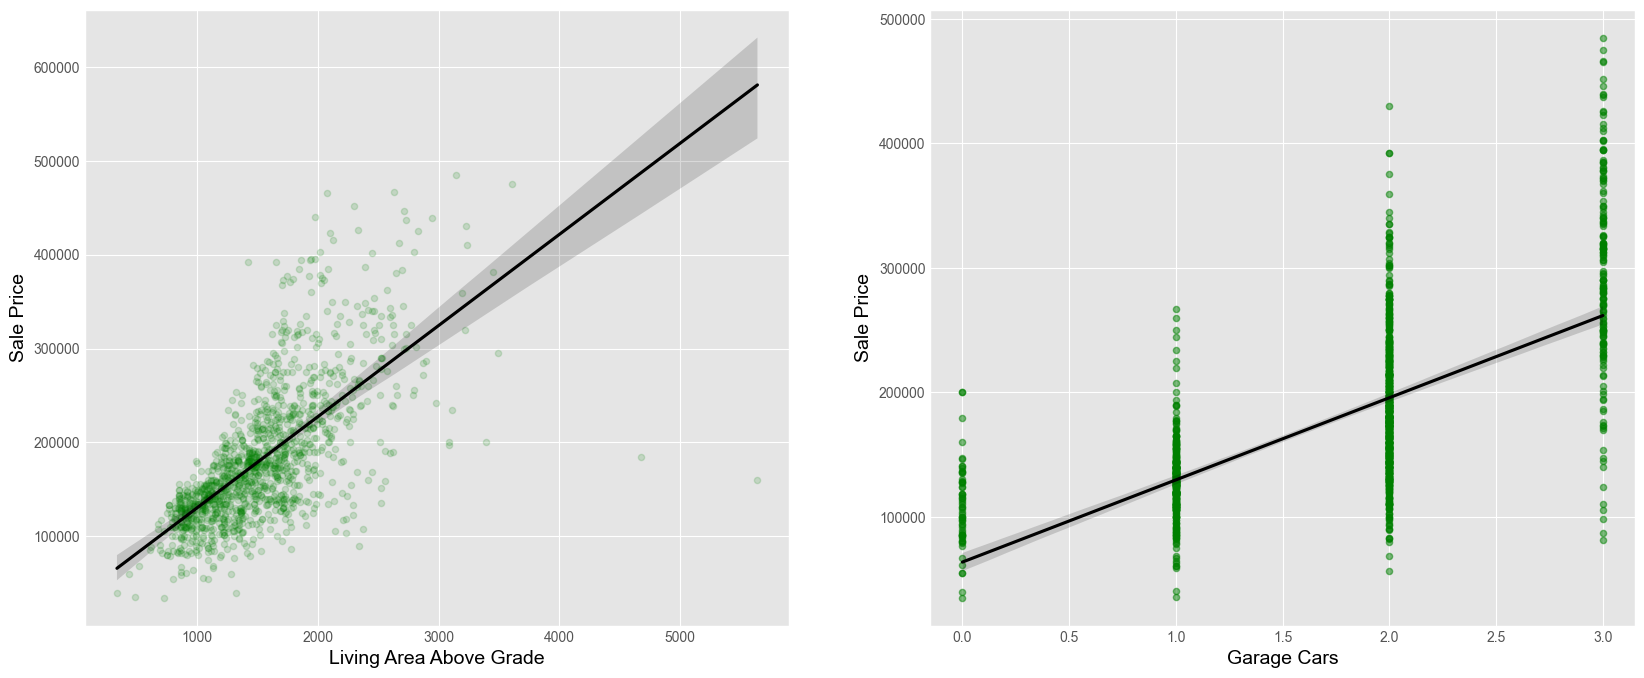

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.regplot(x='Living Area Above Grade', y='Sale Price', data = df_reg2, scatter_kws={"color":"green","alpha":0.15,"s":20},
           line_kws={'color': 'black'})
plt.xlabel('Living Area Above Grade', color = 'black', fontsize='14',loc='center')
plt.ylabel('Sale Price', color = 'black', fontsize='14',loc='center')
plt.subplot(122)
sns.regplot(x='Garage Cars', y='Sale Price', data = df_reg2, scatter_kws={"color":"green","alpha":0.5,"s":20},
           line_kws={'color': 'black'})
plt.xlabel('Garage Cars', color = 'black', fontsize='14',loc='center')
plt.ylabel('Sale Price', color = 'black', fontsize='14',loc='center')

<h4 style="color:black;"> 6d: Create a Joint Plot (jointplot)</h4>

Text(70.20833333333333, 0.5, 'Residual')

<Figure size 2000x800 with 0 Axes>

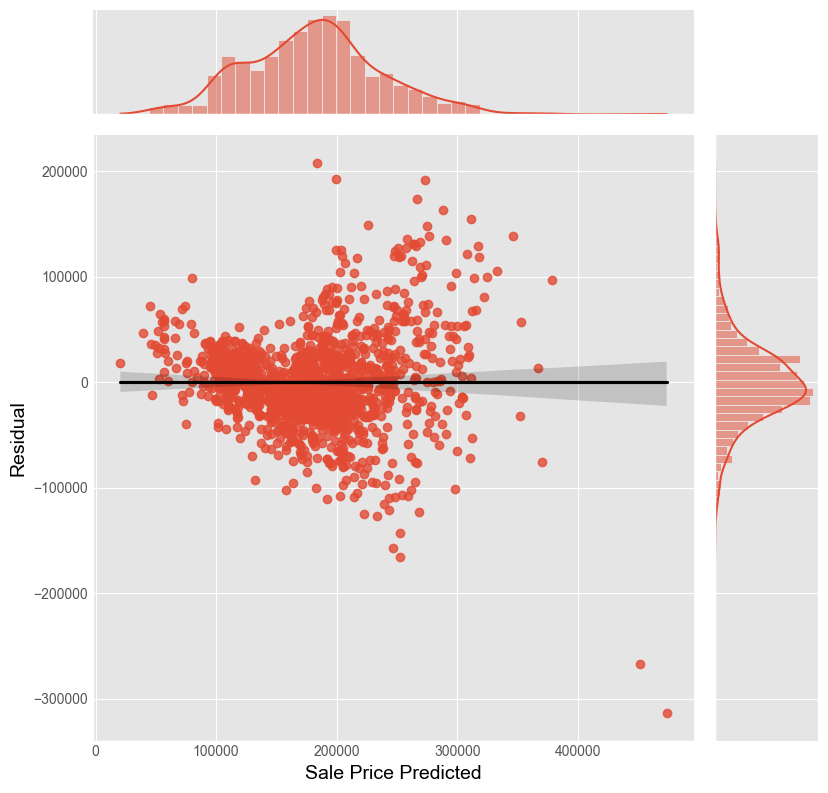

In [19]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Sale Price Predicted', y='Residual', kind = "reg", data = df_reg2, ratio=5, height = 8,
              line_kws={'color': 'black'})
plt.xlabel('Sale Price Predicted', color = 'black', fontsize='14',loc='center')
plt.ylabel('Residual', color = 'black', fontsize='14',loc='center')

<h4 style="color:black;"> 6e: Create a Residual Plot (residplot) based on Kitchen Quality</h4>

In [20]:
df_reg2.head(10)

,Living Area Above Grade,Garage Cars,Sale Price,Sale Price Predicted,Residual
0,1710,2,208500,203768.988587,4731.011413
1,1262,2,181500,173008.762367,8491.237633
2,1786,2,223500,208987.241249,14512.758751
3,1717,3,140000,248612.021697,-108612.021697
4,2198,3,250000,281638.068152,-31638.068152
5,1362,2,143000,179874.884291,-36874.884291
6,1694,2,307000,202670.409079,104329.590921
7,2090,2,200000,229860.251899,-29860.251899
8,1774,2,129900,208163.306619,-78263.306619
9,1077,1,118000,115944.032233,2055.967767


In [21]:
df_reg2['Kitchen Qual'] = df_realestate['Kitchen Qual']

In [22]:
df_reg2.head(10)

,Living Area Above Grade,Garage Cars,Sale Price,Sale Price Predicted,Residual,Kitchen Qual
0,1710,2,208500,203768.988587,4731.011413,Good
1,1262,2,181500,173008.762367,8491.237633,Average
2,1786,2,223500,208987.241249,14512.758751,Good
3,1717,3,140000,248612.021697,-108612.021697,Good
4,2198,3,250000,281638.068152,-31638.068152,Good
5,1362,2,143000,179874.884291,-36874.884291,Average
6,1694,2,307000,202670.409079,104329.590921,Good
7,2090,2,200000,229860.251899,-29860.251899,Average
8,1774,2,129900,208163.306619,-78263.306619,Average
9,1077,1,118000,115944.032233,2055.967767,Average


Text(0, 0.5, 'Residual')

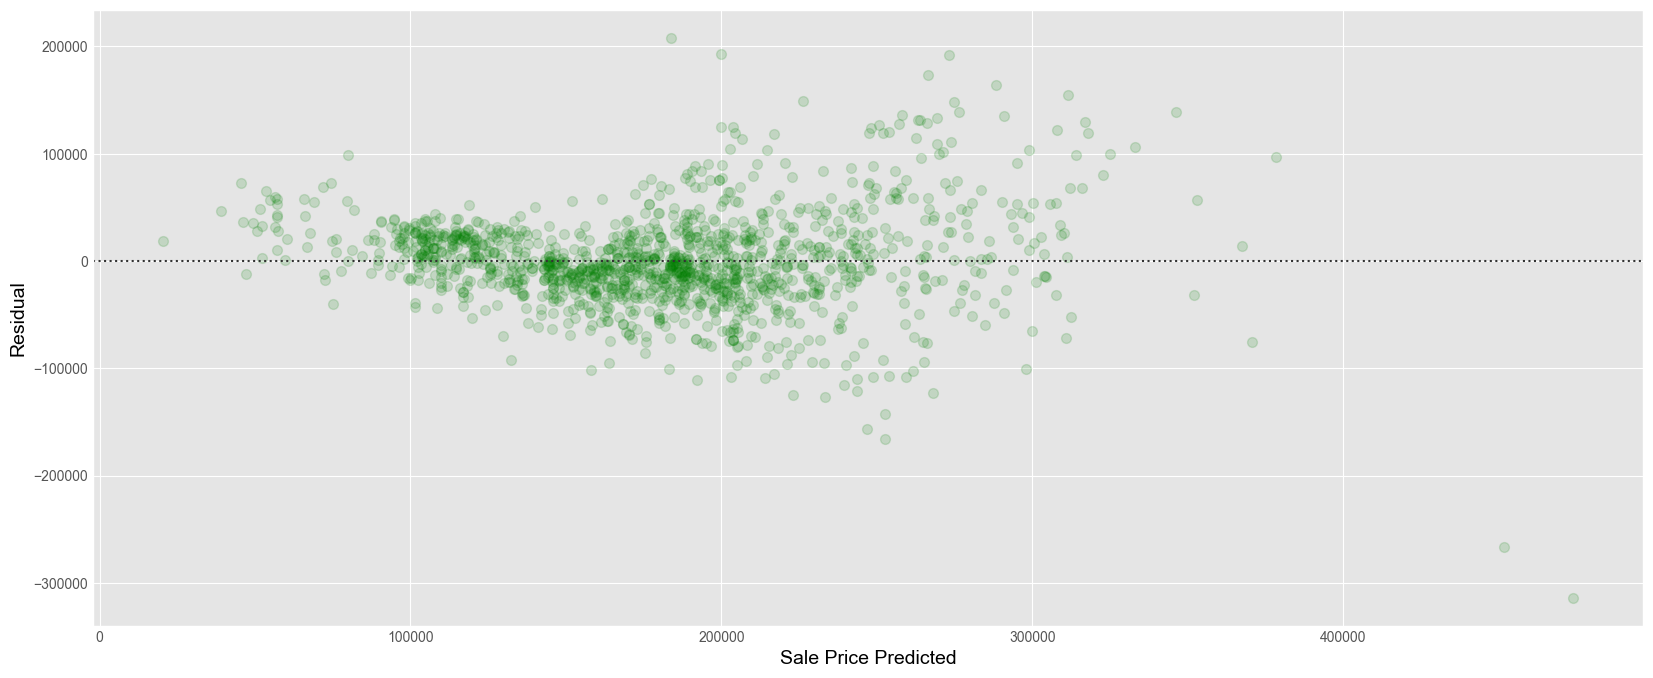

In [23]:
plt.figure(figsize=(20,8))
sns.residplot(x='Sale Price Predicted', y='Residual', data = df_reg2, scatter_kws={"color":"green","alpha":0.15,"s":50},
           line_kws={'color': 'black'})
plt.xlabel('Sale Price Predicted', color = 'black', fontsize='14',loc='center')
plt.ylabel('Residual', color = 'black', fontsize='14',loc='center')

<Figure size 2000x800 with 0 Axes>

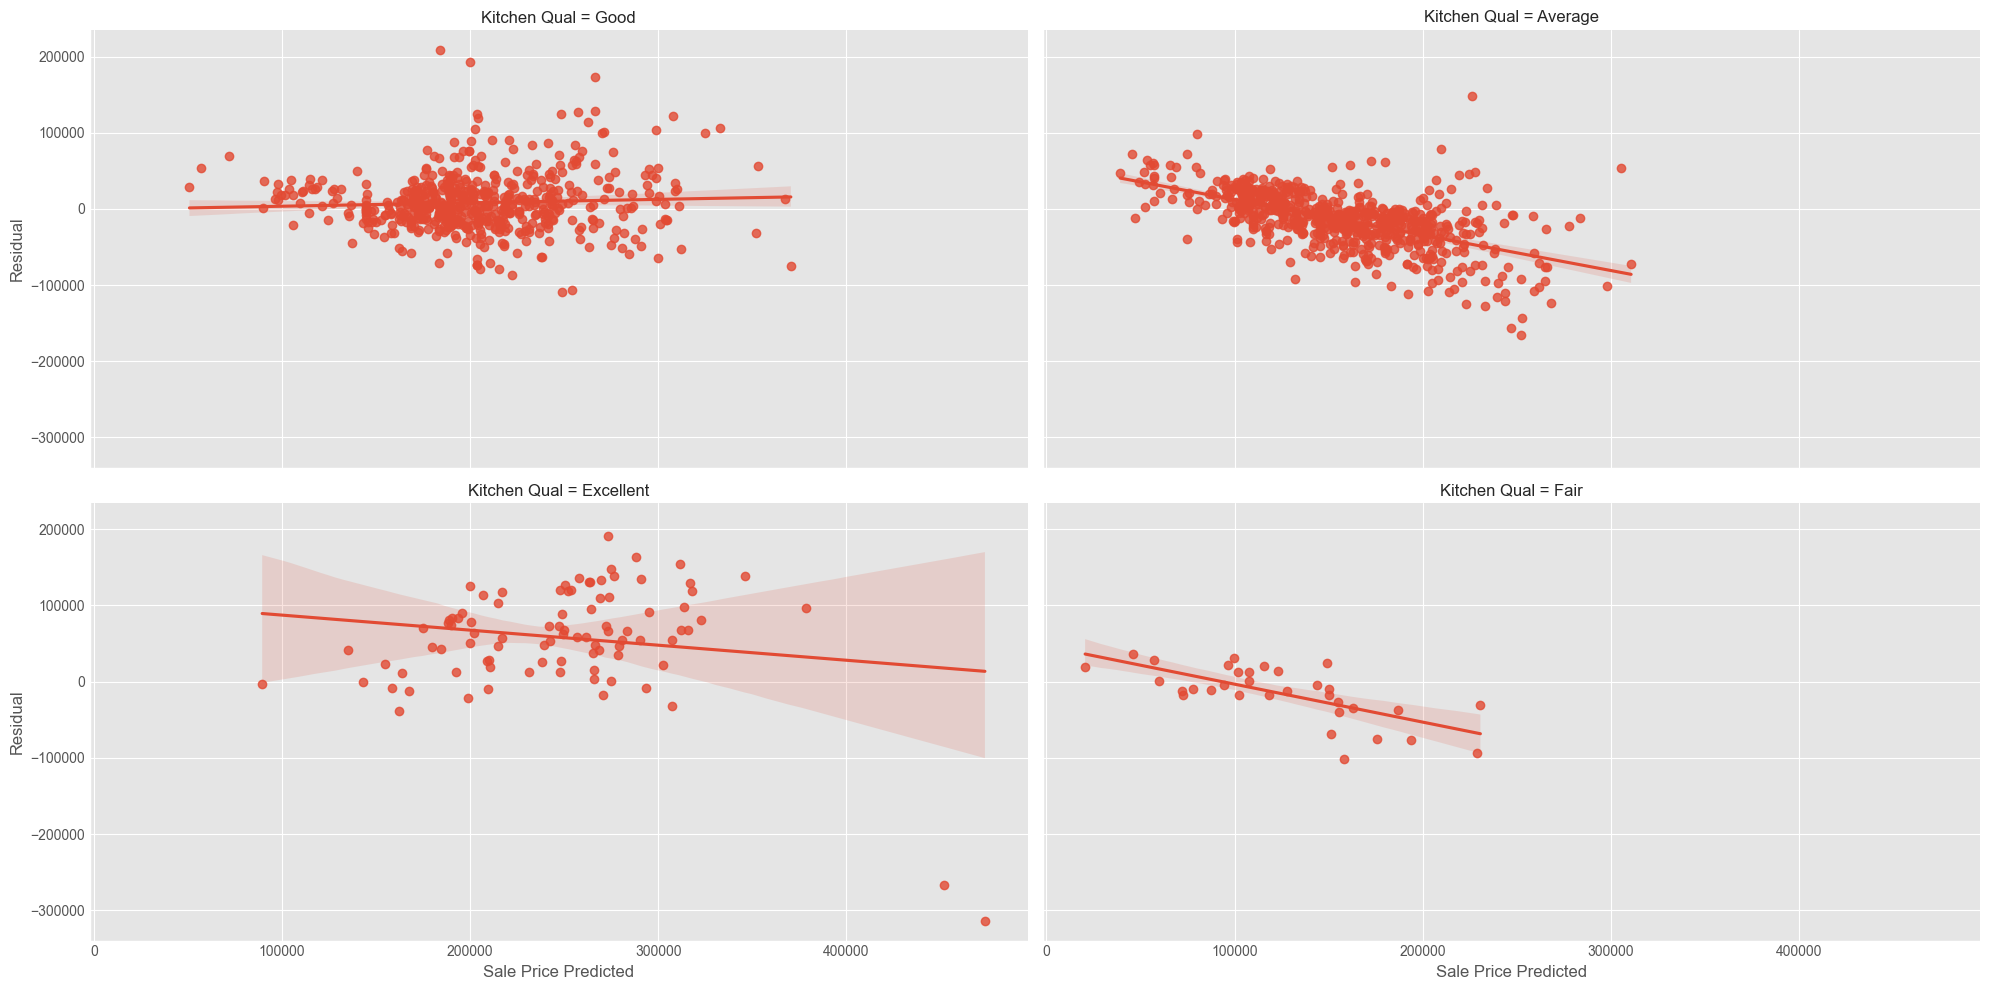

In [24]:
plt.figure(figsize=(20,8))
sns.lmplot(x='Sale Price Predicted', y='Residual', data =df_reg2,  col = 'Kitchen Qual', col_wrap =2, palette="Set1", aspect=2 )

<h4 style="color:black;"> 6f: Explanation of Multiple Regression Results</h4>

<h4 style="color:black;"> 6f.1: Relationship between target and feature variables</h4>

The slope (or the coefficient) of both the regression plot is positive. That means Living Area above grade when increases , Sale price will also increase considering Garage Cars are constant and do not change. Similarly, when Garage cars increase, Sale Price will also increase considering Living area above grade does not change.    

<h4 style="color:black;"> 6f.2: Did the relationship improve by including Garage Cars?</h4>

AS we can see from R2 score of both single and multiple regression model, R2 score changes from 0.463 to 0.62. So, we can conclude that including another feature like Garage Cars improves the model accuracy.  

<h3 style="color:black;"> 7. Create own multiple regression</h3>

<h4 style="color:black;"> 7a: Create a Multiple regression for Sale Price with Basement Unfinished Area and Bedrooms Above Grade </h4>

In [24]:
X = df_realestate[['Basement Unfinished Area', 'Bedrooms Above Grade']]
y = df_realestate['Sale Price']
X = sm.add_constant(X) # adding a constant
reg3 = sm.OLS(y, X).fit() # fitting the model and name the model reg
pred3 = reg3.predict(X)   # predicting with the model and name it pred
resid3 = reg3.resid    #creating the residuals and name it resid
reg3.summary()   #summary of the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     45.06
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           1.09e-19
Time:                        19:59:17   Log-Likelihood:                -17465.
No. Observations:                1390   AIC:                         3.494e+04
Df Residuals:                    1387   BIC:                         3.495e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.335e+05   7145.216     18.689      0.000     1.2e+05    1.48e+05
Basement Unfinished Area    33.0934      4.259      7.770      0.000      24.738      41.449
Bedrooms Above Grade      9947.6947   2370.416      4.197      0.000    5297.707    1.46e+04
==============================================================================
Omnibus:                      301.789   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.849
Skew:                           1.263   Prob(JB):                    7.51e-132
Kurtosis:                       5.012   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h4 style="color:black;"> 7b: Create a Regression Table for Multiple Regression </h4>

In [26]:
df_reg3 = pd.DataFrame()
df_reg3 = df_realestate[['Basement Unfinished Area', 'Bedrooms Above Grade','Sale Price']]
df_reg3 = pd.concat([df_reg3, pred3], axis=1, ignore_index=False)
df_reg3['1']=resid3
df_reg3.head(10)

,Basement Unfinished Area,Bedrooms Above Grade,Sale Price,0,1
0,150,3,208500,168343.149531,40156.850469
1,284,3,181500,172777.666310,8722.333690
2,434,3,223500,177741.677629,45758.322371
3,540,3,140000,181249.578961,-41249.578961
4,490,4,250000,189542.603180,60457.396820
5,64,1,143000,145601.727058,-2601.727058
6,317,3,307000,173869.748800,133130.251200
7,216,3,200000,170527.314512,29472.685488
8,952,2,129900,184936.368727,-55036.368727
9,140,2,118000,158064.520785,-40064.520785


In [27]:
df_reg3=df_reg3.rename(columns = {0:'Sale Price Predicted'})
df_reg3=df_reg3.rename(columns = {'1':'Residual'})
df_reg3.head(10)

,Basement Unfinished Area,Bedrooms Above Grade,Sale Price,Sale Price Predicted,Residual
0,150,3,208500,168343.149531,40156.850469
1,284,3,181500,172777.666310,8722.333690
2,434,3,223500,177741.677629,45758.322371
3,540,3,140000,181249.578961,-41249.578961
4,490,4,250000,189542.603180,60457.396820
5,64,1,143000,145601.727058,-2601.727058
6,317,3,307000,173869.748800,133130.251200
7,216,3,200000,170527.314512,29472.685488
8,952,2,129900,184936.368727,-55036.368727
9,140,2,118000,158064.520785,-40064.520785


<h4 style="color:black;"> 7c: Create a Regression Plot (regplot)</h4>

Text(0, 0.5, 'Sale Price')

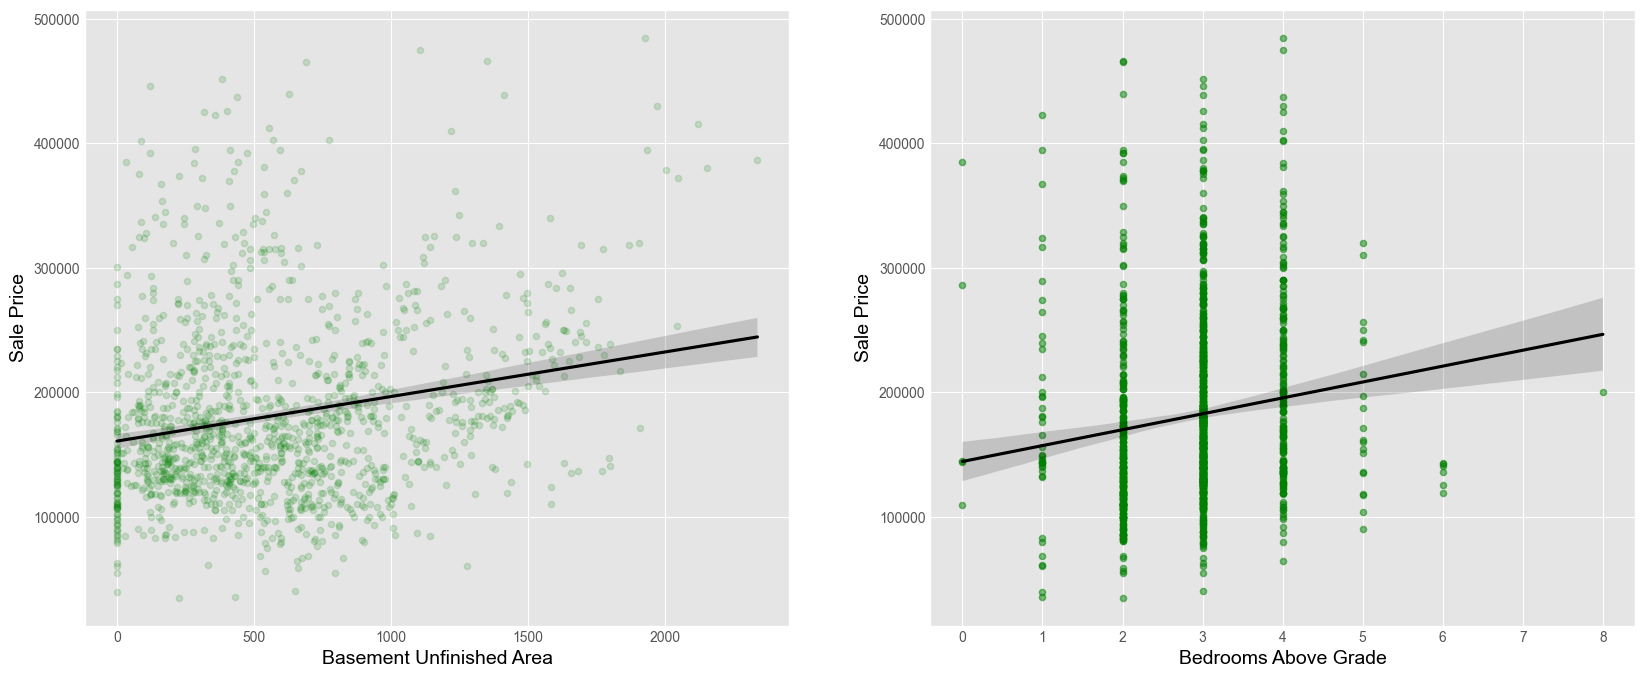

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.regplot(x='Basement Unfinished Area', y='Sale Price', data = df_reg3, scatter_kws={"color":"green","alpha":0.15,"s":20},
           line_kws={'color': 'black'})
plt.xlabel('Basement Unfinished Area', color = 'black', fontsize='14',loc='center')
plt.ylabel('Sale Price', color = 'black', fontsize='14',loc='center')
plt.subplot(122)
sns.regplot(x='Bedrooms Above Grade', y='Sale Price', data = df_reg3, scatter_kws={"color":"green","alpha":0.5,"s":20},
           line_kws={'color': 'black'})
plt.xlabel('Bedrooms Above Grade', color = 'black', fontsize='14',loc='center')
plt.ylabel('Sale Price', color = 'black', fontsize='14',loc='center')

<h4 style="color:black;"> 7d: Explanation Multiple Regression Results</h4>

<h4 style="color:black;"> 7d.1: Why did you chose these features?</h4>

Basement Unfinished area and Bedrooms above Grade , I thought these features will significantly influence the Sale Price. Based on this motivation, I choose these two features. 

<h4 style="color:black;"> 7d.2: What is the relationship between features and target variables?</h4>

As we can see from the regression plot, the slop or coefficient is positive. So, When Basement Unfinished Area will increase, Sale Price will increase considering Bedrooms above grade does not change. Similarly, When Bedrooms above Grade will increase, Sale price will increase considering Basement Unfinished area does not change.  

<h4 style="color:black;"> 7d.3: What is the relationship between features and target variables?</h4>

Regression plots suggest it is not good model . It means Basement Unfinished Areaand Bedrooms above grade is not efecting much on Sale price. AS I described, points are scattred from straight line, not falling on the line. It is also clear from R2 scor which is very low (0.061).  